# MonkeyPox

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d muhammad4hmed/monkeypox-patients-dataset

Dataset URL: https://www.kaggle.com/datasets/muhammad4hmed/monkeypox-patients-dataset
License(s): CC0-1.0
100%|█████████████████████████████████████████| 155k/155k [00:00<00:00, 196kB/s]
100%|█████████████████████████████████████████| 155k/155k [00:00<00:00, 196kB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/MonkeyPox Prediction/monkeypox-patients-dataset.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/MonkeyPox Prediction')
zip_ref.close()

## Explaratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('DATA.csv')

In [5]:
df.head()

,Patient_ID,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
0,P0,NaN,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,NaN,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [6]:
df.shape

(25000, 11)

In [7]:
df.size

275000

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Patient_ID                      25000 non-null  object
 1   Systemic Illness                18784 non-null  object
 2   Rectal Pain                     25000 non-null  bool  
 3   Sore Throat                     25000 non-null  bool  
 4   Penile Oedema                   25000 non-null  bool  
 5   Oral Lesions                    25000 non-null  bool  
 6   Solitary Lesion                 25000 non-null  bool  
 7   Swollen Tonsils                 25000 non-null  bool  
 8   HIV Infection                   25000 non-null  bool  
 9   Sexually Transmitted Infection  25000 non-null  bool  
 10  MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(3)
memory usage: 781.4+ KB


In [9]:
df.describe().T

,count,unique,top,freq
Patient_ID,25000,25000,P24999,1
Systemic Illness,18784,3,Fever,6382
Rectal Pain,25000,2,False,12655
Sore Throat,25000,2,True,12554
Penile Oedema,25000,2,True,12612
Oral Lesions,25000,2,False,12514
Solitary Lesion,25000,2,True,12527
Swollen Tonsils,25000,2,True,12533
HIV Infection,25000,2,True,12584
Sexually Transmitted Infection,25000,2,False,12554


In [10]:
df.isnull().sum()

Patient_ID                           0
Systemic Illness                  6216
Rectal Pain                          0
Sore Throat                          0
Penile Oedema                        0
Oral Lesions                         0
Solitary Lesion                      0
Swollen Tonsils                      0
HIV Infection                        0
Sexually Transmitted Infection       0
MonkeyPox                            0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Patient_ID                        25000
Systemic Illness                      3
Rectal Pain                           2
Sore Throat                           2
Penile Oedema                         2
Oral Lesions                          2
Solitary Lesion                       2
Swollen Tonsils                       2
HIV Infection                         2
Sexually Transmitted Infection        2
MonkeyPox                             2
dtype: int64

In [13]:
df['MonkeyPox'].value_counts()

MonkeyPox
Positive    15909
Negative     9091
Name: count, dtype: int64

## Data Preprocessing

In [16]:
# Dropping unwanted columns

df.drop(columns=['Patient_ID'], inplace=True)

In [17]:
# Dropping na values

df.dropna(inplace=True)

In [18]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [19]:
X = df.drop(columns=['MonkeyPox'])
y = df['MonkeyPox']

In [20]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [21]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [22]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [23]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.7000266169816343, 0.7008251264306627, 0.6994942773489486, 0.6915091828586638, 0.7146659568804897, 0.7154644663295182, 0.6907106734096353, 0.6861857865318073, 0.7104072398190046]


## Model Evalaution

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.17      0.26      1173
           1       0.71      0.94      0.81      2584

    accuracy                           0.70      3757
   macro avg       0.64      0.56      0.54      3757
weighted avg       0.67      0.70      0.64      3757

Confusion Matrix:
 [[ 202  971]
 [ 156 2428]]


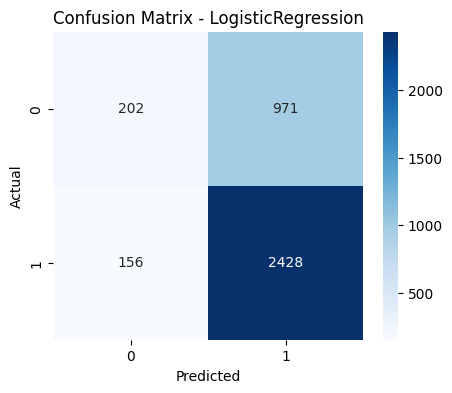

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.15      0.24      1173
           1       0.71      0.95      0.81      2584

    accuracy                           0.70      3757
   macro avg       0.65      0.55      0.53      3757
weighted avg       0.67      0.70      0.64      3757

Confusion Matrix:
 [[ 180  993]
 [ 131 2453]]


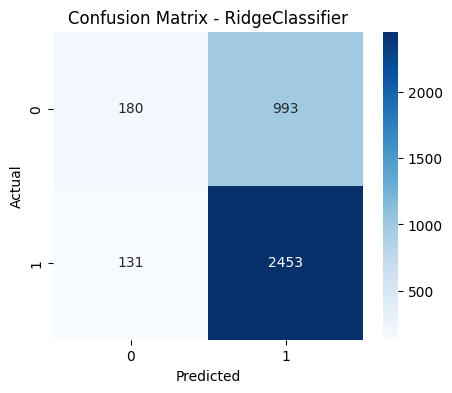

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.30      0.38      1173
           1       0.73      0.88      0.80      2584

    accuracy                           0.70      3757
   macro avg       0.63      0.59      0.59      3757
weighted avg       0.67      0.70      0.67      3757

Confusion Matrix:
 [[ 352  821]
 [ 308 2276]]


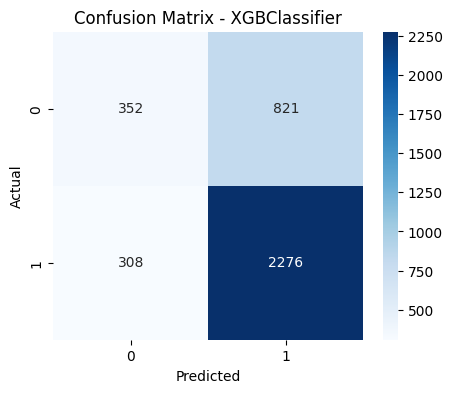

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.29      0.37      1173
           1       0.73      0.88      0.80      2584

    accuracy                           0.69      3757
   macro avg       0.62      0.58      0.59      3757
weighted avg       0.66      0.69      0.67      3757

Confusion Matrix:
 [[ 344  829]
 [ 322 2262]]


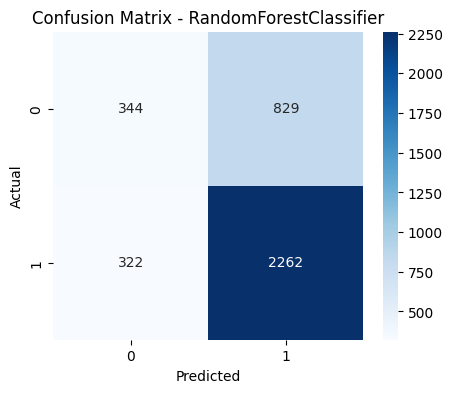

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.32      0.41      1173
           1       0.74      0.89      0.81      2584

    accuracy                           0.71      3757
   macro avg       0.66      0.61      0.61      3757
weighted avg       0.69      0.71      0.69      3757

Confusion Matrix:
 [[ 374  799]
 [ 273 2311]]


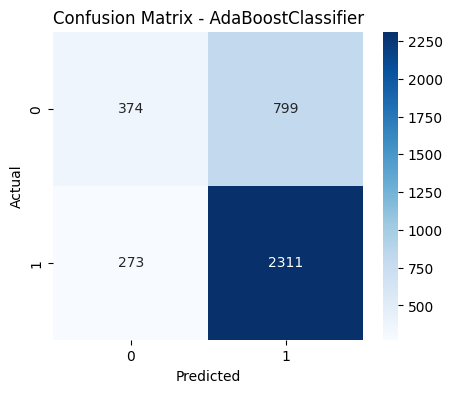

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.30      0.39      1173
           1       0.74      0.91      0.81      2584

    accuracy                           0.72      3757
   macro avg       0.66      0.60      0.60      3757
weighted avg       0.69      0.72      0.68      3757

Confusion Matrix:
 [[ 347  826]
 [ 243 2341]]


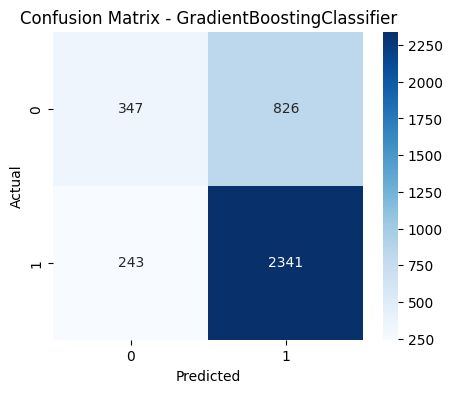

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38      1173
           1       0.73      0.86      0.79      2584

    accuracy                           0.69      3757
   macro avg       0.62      0.58      0.58      3757
weighted avg       0.66      0.69      0.66      3757

Confusion Matrix:
 [[ 355  818]
 [ 353 2231]]


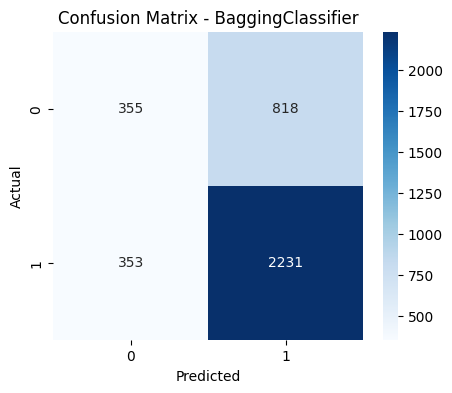

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.30      0.38      1173
           1       0.73      0.86      0.79      2584

    accuracy                           0.69      3757
   macro avg       0.61      0.58      0.58      3757
weighted avg       0.66      0.69      0.66      3757

Confusion Matrix:
 [[ 357  816]
 [ 363 2221]]


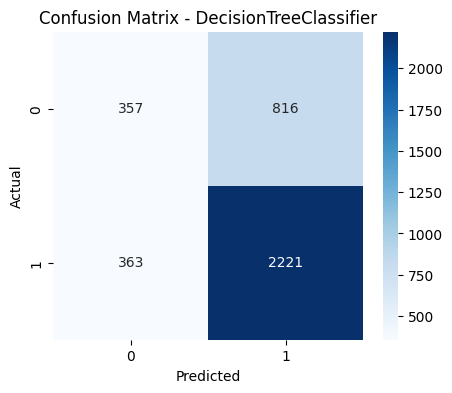

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.22      0.33      1173
           1       0.73      0.93      0.82      2584

    accuracy                           0.71      3757
   macro avg       0.66      0.58      0.57      3757
weighted avg       0.69      0.71      0.66      3757

Confusion Matrix:
 [[ 263  910]
 [ 178 2406]]


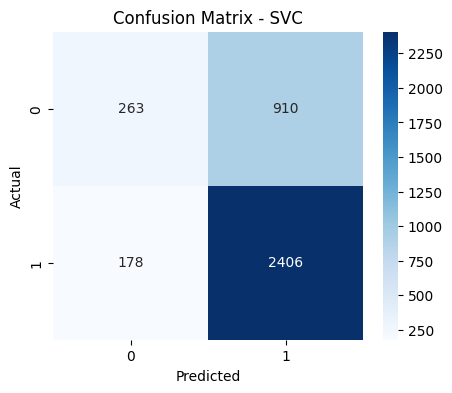

In [24]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()